In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with MUET-SW.txt','r', encoding = 'utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

3/2/25, 12:34 AM - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
8/2/22, 9:42 PM - +92 307 8611011 created group "MUET - SW"
8/2/22, 9:42 PM - You were added
3/2/25, 1:23 PM - +92 311 3024024: <Media omitted>
3/2/25, 2:50 PM - +92 344 0307564: 21 ka ABIS final ka paper bhejo kindly agar kisi ke pass he to
3/2/25, 2:56 PM - +92 332 8284870: @⁨~Leave Me⁩
3/2/25, 3:17 PM - +92 335 3093489: Hiring ASO Specialist for Google Play Store – Project-Based (Remote)

I need someone who knows the ins and outs of the Google Play Store to upload an Android app and handle the approval process. If you’ve dealt with app rejections and Play Store policies, this should be easy for you.

✅ Project-based work – just upload the app and get it live
✅ If things go well, we can work together on future ASO and marketing
✅ Remote & flexible – work from anywhere, at your own time

If you’ve got the experience and can get the job done without i

In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}(?:\s|\u202f)[AP]M\s-\s'


In [6]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 '+92 307 8611011 created group "MUET - SW"\n',
 'You were added\n',
 '+92 311 3024024: <Media omitted>\n',
 '+92 344 0307564: 21 ka ABIS final ka paper bhejo kindly agar kisi ke pass he to\n',
 '+92 332 8284870: @\u2068~Leave Me\u2069\n',
 '+92 335 3093489: Hiring ASO Specialist for Google Play Store – Project-Based (Remote)\n\nI need someone who knows the ins and outs of the Google Play Store to upload an Android app and handle the approval process. If you’ve dealt with app rejections and Play Store policies, this should be easy for you.\n\n✅ Project-based work – just upload the app and get it live\n✅ If things go well, we can work together on future ASO and marketing\n✅ Remote & flexible – work from anywhere, at your own time\n\nIf you’ve got the experience and can get the job done without issues, let’s connect.\n\n\n\n#ASO #GooglePlay #AppStoreOptimization #Fr

In [7]:
dates = re.findall(pattern, data)
dates

['3/2/25, 12:34\u202fAM - ',
 '8/2/22, 9:42\u202fPM - ',
 '8/2/22, 9:42\u202fPM - ',
 '3/2/25, 1:23\u202fPM - ',
 '3/2/25, 2:50\u202fPM - ',
 '3/2/25, 2:56\u202fPM - ',
 '3/2/25, 3:17\u202fPM - ',
 '3/2/25, 4:15\u202fPM - ',
 '3/2/25, 4:25\u202fPM - ',
 '3/2/25, 4:59\u202fPM - ',
 '3/2/25, 7:28\u202fPM - ',
 '3/3/25, 7:55\u202fPM - ',
 '3/3/25, 7:55\u202fPM - ',
 '3/3/25, 7:57\u202fPM - ',
 '3/4/25, 7:35\u202fPM - ',
 '3/4/25, 7:39\u202fPM - ',
 '3/4/25, 8:30\u202fPM - ',
 '3/5/25, 7:35\u202fPM - ',
 '3/5/25, 8:19\u202fPM - ',
 '3/5/25, 8:19\u202fPM - ',
 '3/5/25, 8:20\u202fPM - ',
 '3/5/25, 8:21\u202fPM - ',
 '3/5/25, 8:22\u202fPM - ',
 '3/5/25, 8:25\u202fPM - ',
 '3/5/25, 8:25\u202fPM - ',
 '3/5/25, 8:25\u202fPM - ',
 '3/5/25, 8:25\u202fPM - ',
 '3/5/25, 11:52\u202fPM - ',
 '3/5/25, 11:52\u202fPM - ',
 '3/5/25, 11:53\u202fPM - ',
 '3/5/25, 11:54\u202fPM - ',
 '3/5/25, 11:54\u202fPM - ',
 '3/5/25, 11:55\u202fPM - ',
 '3/5/25, 11:55\u202fPM - ',
 '3/5/25, 11:56\u202fPM - ',
 '3/6/25, 1

In [8]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})

df['message_date'] = pd.to_datetime(df['message_date'], format = '%d/%m/%y, %I:%M %p - ', errors = 'coerce')

df.rename(columns = {'message_date':'date'}, inplace  = True)

df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2025-02-03 00:34:00
1,"+92 307 8611011 created group ""MUET - SW""\n",2022-02-08 21:42:00
2,You were added\n,2022-02-08 21:42:00
3,+92 311 3024024: <Media omitted>\n,2025-02-03 13:23:00
4,+92 344 0307564: 21 ka ABIS final ka paper bhe...,2025-02-03 14:50:00


In [9]:
df.shape

(3336, 2)

In [10]:
users = []
messages = []
for message in df['user_message'] :
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace = True)

df.head()

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Ahmed Mustafa\AppData\Local\Temp\ipykernel_11080\2222646032.py:4: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s', message)


,date,user,message
0,2025-02-03 00:34:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2022-02-08 21:42:00,group_notification,"+92 307 8611011 created group ""MUET - SW""\n"
2,2022-02-08 21:42:00,group_notification,You were added\n
3,2025-02-03 13:23:00,+92 311 3024024,<Media omitted>\n
4,2025-02-03 14:50:00,+92 344 0307564,21 ka ABIS final ka paper bhejo kindly agar ki...


In [11]:
df['Year'] = df['date'].dt.year

In [12]:
df.head()

,date,user,message,Year
0,2025-02-03 00:34:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025.0
1,2022-02-08 21:42:00,group_notification,"+92 307 8611011 created group ""MUET - SW""\n",2022.0
2,2022-02-08 21:42:00,group_notification,You were added\n,2022.0
3,2025-02-03 13:23:00,+92 311 3024024,<Media omitted>\n,2025.0
4,2025-02-03 14:50:00,+92 344 0307564,21 ka ABIS final ka paper bhejo kindly agar ki...,2025.0


In [13]:
df['Month'] = df['date'].dt.month_name()

In [14]:
df['Day']= df['date'].dt.day

In [15]:
df.head()

,date,user,message,Year,Month,Day
0,2025-02-03 00:34:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025.0,February,3.0
1,2022-02-08 21:42:00,group_notification,"+92 307 8611011 created group ""MUET - SW""\n",2022.0,February,8.0
2,2022-02-08 21:42:00,group_notification,You were added\n,2022.0,February,8.0
3,2025-02-03 13:23:00,+92 311 3024024,<Media omitted>\n,2025.0,February,3.0
4,2025-02-03 14:50:00,+92 344 0307564,21 ka ABIS final ka paper bhejo kindly agar ki...,2025.0,February,3.0


In [16]:
df['Hour'] = df['date'].dt.hour

In [17]:
df['Minute'] = df['date'].dt.minute

In [18]:
df.head()

,date,user,message,Year,Month,Day,Hour,Minute
0,2025-02-03 00:34:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025.0,February,3.0,0.0,34.0
1,2022-02-08 21:42:00,group_notification,"+92 307 8611011 created group ""MUET - SW""\n",2022.0,February,8.0,21.0,42.0
2,2022-02-08 21:42:00,group_notification,You were added\n,2022.0,February,8.0,21.0,42.0
3,2025-02-03 13:23:00,+92 311 3024024,<Media omitted>\n,2025.0,February,3.0,13.0,23.0
4,2025-02-03 14:50:00,+92 344 0307564,21 ka ABIS final ka paper bhejo kindly agar ki...,2025.0,February,3.0,14.0,50.0


In [19]:
df[df['user'] == 'Arham Abbas'].shape

(177, 8)

In [20]:
df['message']

0       Messages and calls are end-to-end encrypted. O...
1             +92 307 8611011 created group "MUET - SW"\n
2                                        You were added\n
3                                       <Media omitted>\n
4       21 ka ABIS final ka paper bhejo kindly agar ki...
                              ...                        
3331    ap sabki bharpoor farmaish pr ek baar phirse p...
3332                                                   \n
3333                            Term back ho rhy hain??\n
3334    Arham Abbas changed this group's settings to a...
3335                                 Haan beta abh karo\n
Name: message, Length: 3336, dtype: object

In [21]:
words = []
for message in df['message']:
    words.extend(message.split())

In [22]:
len(words)

23634

In [23]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.com")
urls

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.com']

In [24]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [25]:
len(links)

121

In [26]:
x = df['user'].value_counts().head()

In [27]:
import matplotlib.pyplot as plt

In [28]:
name = x.index
count = x.values

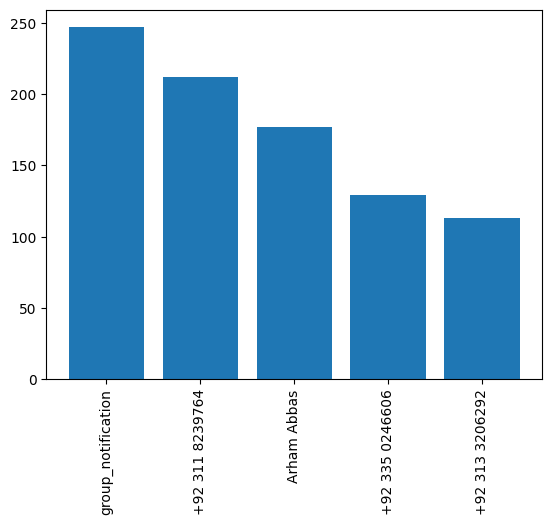

In [29]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
round((df['user'].value_counts()/df.shape[0]) * 100).reset_index().rename(columns = {'user':'name','count':'percent'})

,name,percent
0,group_notification,7.0
1,+92 311 8239764,6.0
2,Arham Abbas,5.0
3,+92 335 0246606,4.0
4,+92 313 3206292,3.0
...,...,...
346,+92 333 2627284,0.0
347,+92 327 9288916,0.0
348,+92 343 0921721,0.0
349,+92 318 3066522,0.0


In [31]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [32]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()

In [33]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [34]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,322
1,deleted,213
2,<this,81
3,edited>,81
4,congratulations,67
5,kindly,36
6,students,36
7,dm,30
8,share,29
9,&,28
